<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/TrueVolume_%E7%BE%8E%E8%82%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

統計起始日:2023/01/01
INDO
[*********************100%%**********************]  1 of 1 completed
score:12


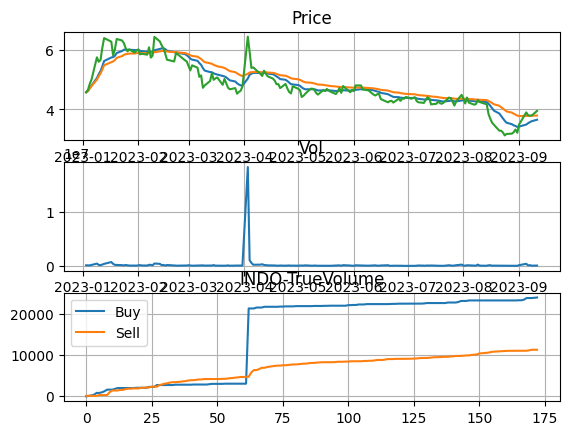

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

thisday = datetime.today()
#day_start = thisday - timedelta(days=365)
day_start = thisday.replace(month=1, day=1)

print("統計起始日:"+day_start.strftime("%Y/%m/%d"))

stoid='INDO'
print(stoid)

# 讀取股價資料
df = yf.download(stoid,start=day_start, end=thisday)

#計算TueV

opp=df['Open']
clo=df['Close']
voo=df['Volume']
hig=df['High']
llo=df['Low']
upl=[]
dol=[]
bll=[]
upc=0.0
dlc=0.0
blc=0.0
lp=0.0

for i in range(len(opp)):
  if(lp==0.0):
    lp=opp[i]
  if(opp[i]<clo[i]):
    if(clo[i] >= opp[i] + ((hig[i] - opp[i])/3) and clo[i]>=lp):
      upc+=(voo[i]/1000)
    else:
      if(clo[i] < opp[i] + ((hig[i] - opp[i])/4)):
        dlc+=(voo[i]/1000)
  else:
    if(clo[i] < lp) or clo[i] <= llo[i]+((opp[i]-llo[i])/3):
      dlc+=(voo[i]/1000)
  upl.append(upc)
  dol.append(dlc)
  blc+=voo[i]/1000
  bll.append(blc/2)
  lp=clo[i]

clo1=pd.DataFrame(clo)
ema10=clo1.ewm(span=13).mean()
ema30=clo1.ewm(span=35).mean()

e10=ema10.iloc[-1]
e30=ema30.iloc[-1]
score=(e10-e30)+((upc-dlc)/1000)
print("score:"+ str(int(score.iloc[0])))

plt.subplot(311)
plt.plot(ema10)
plt.plot(ema30)
plt.plot(clo)
plt.title('Price')
plt.grid()

plt.subplot(312)
plt.plot(voo)
plt.title('Vol')
plt.grid()

plt.subplot(313)
plt.plot(upl, label='Buy')
plt.plot(dol, label='Sell')
#plt.plot(bll, label='On Balanced')
plt.title(stoid+'-TrueVolume')
plt.grid()

plt.legend()

plt.show()